In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lags = [
    2, 10, 36, 50, 100
]

In [3]:
dts = pd.date_range('2015-01-01', '2020-01-27')

In [4]:
xs = np.arange(len(dts))

In [12]:
test_ts = 4*np.sin(0.1*xs) + 7*np.cos(0.04*xs) + 0.01*xs + 2*np.random.randn(len(xs))

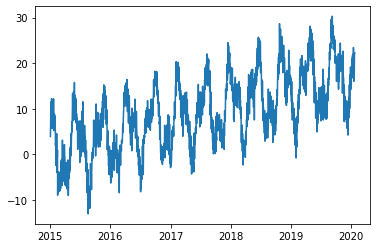

In [13]:
plt.plot(dts, test_ts)

In [14]:

df_ts = pd.DataFrame(
    index=dts,
    data={
        'ts': test_ts
    }
)

In [15]:
df_ts

,ts
2015-01-01,3.918657
2015-01-02,7.105503
2015-01-03,9.011262
2015-01-04,9.242989
2015-01-05,6.101447
...,...
2020-01-23,21.768635
2020-01-24,17.763197
2020-01-25,21.820422
2020-01-26,22.045844


In [18]:

df_ts['ts'].shift(-4)

2015-01-01     6.101447
2015-01-02    11.512260
2015-01-03     7.708986
2015-01-04    12.221373
2015-01-05     7.064837
                ...    
2020-01-23    22.261423
2020-01-24          NaN
2020-01-25          NaN
2020-01-26          NaN
2020-01-27          NaN
Freq: D, Name: ts, Length: 1853, dtype: float64

In [46]:
for lag in lags:
    df_ts[f'ts_lag{lag}'] = df_ts['ts'].shift(-lag) + 1*np.random.randn(len(xs))

In [47]:
df_ts

,ts,ts_lag2,ts_lag10,ts_lag36,ts_lag50,ts_lag100
2015-01-01,3.918657,8.994915,9.949024,-0.779262,-4.897912,-3.154977
2015-01-02,7.105503,9.795846,7.226846,-2.266945,-4.074101,-5.337403
2015-01-03,9.011262,6.611747,9.202592,3.647276,-7.056239,-8.337867
2015-01-04,9.242989,11.599425,10.194954,-1.686528,-7.322694,-5.038158
2015-01-05,6.101447,7.739107,9.933462,-4.242043,-9.034874,-5.198620
...,...,...,...,...,...,...
2020-01-23,21.768635,23.019488,NaN,NaN,NaN,NaN
2020-01-24,17.763197,22.500342,NaN,NaN,NaN,NaN
2020-01-25,21.820422,22.923253,NaN,NaN,NaN,NaN
2020-01-26,22.045844,NaN,NaN,NaN,NaN,NaN


In [48]:
pd.DataFrame().append(df_ts.corr()['ts'].to_frame('lag0').T.append(df_ts.corr()['ts'].to_frame('lag1').T))

,ts,ts_lag2,ts_lag10,ts_lag36,ts_lag50,ts_lag100
lag0,1.0,0.92114,0.838425,0.343583,0.302058,0.030333
lag1,1.0,0.92114,0.838425,0.343583,0.302058,0.030333


In [79]:
def calc_lag_corr_df(
    df_ts: pd.DataFrame,
    target_col: str,
    max_lag: int=300
):
    df_ts_lag = df_ts.copy()
    df_corrs = []
    for lag in range(max_lag):
        df_ts_lag['target_lag'] = df_ts[target_col].shift(-(lag+1))
        df_corr = df_ts_lag.corr()['target_lag'].to_frame(f'lag{lag+1}').T
        df_corrs.append(df_corr)
    return pd.concat(df_corrs).drop(['target_lag', target_col], axis=1)

In [80]:
def find_max_lags(df_lag_corr: pd.DataFrame):
    return {col: df_lag_corr[col].argmax()+1 for col in df_lag_corr.columns}

In [81]:
df_lag_corr = calc_lag_corr_df(df_ts, 'ts', 150)

In [82]:
df_lag_corr

,ts_lag2,ts_lag10,ts_lag36,ts_lag50,ts_lag100
lag1,0.923395,0.857128,0.349379,0.302778,0.013383
lag2,0.992296,0.869864,0.364123,0.300499,-0.005378
lag3,0.922703,0.882277,0.372737,0.302408,-0.019743
lag4,0.920981,0.895532,0.388619,0.305985,-0.031346
lag5,0.916224,0.902309,0.405243,0.306653,-0.040118
...,...,...,...,...,...
lag146,0.687951,0.722192,0.284335,-0.033227,0.257458
lag147,0.681522,0.719075,0.313094,-0.019010,0.256793
lag148,0.674913,0.719208,0.340843,-0.000347,0.255304
lag149,0.668426,0.717446,0.369019,0.016747,0.257201


In [83]:
find_max_lags(df_lag_corr)

{'ts_lag10': 10,
 'ts_lag100': 100,
 'ts_lag2': 2,
 'ts_lag36': 36,
 'ts_lag50': 50}

In [84]:
df_lag_corr[f'ts_lag{lag}'].argmax()

99

corr_maxlag = 2


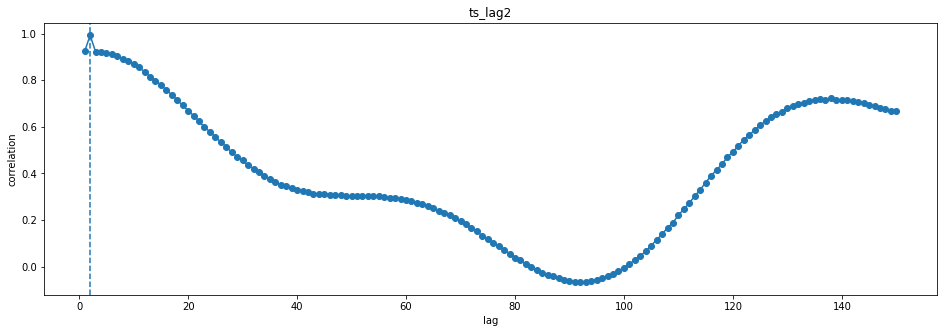

corr_maxlag = 10


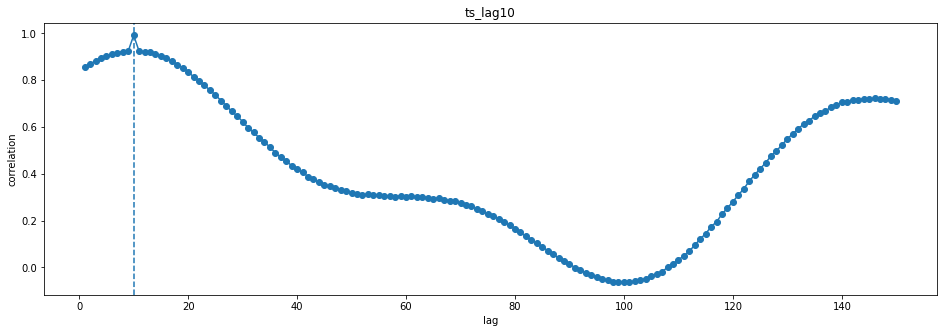

corr_maxlag = 36


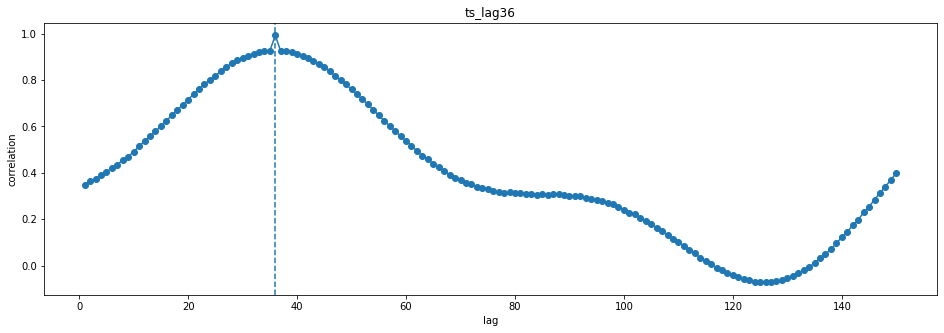

corr_maxlag = 50


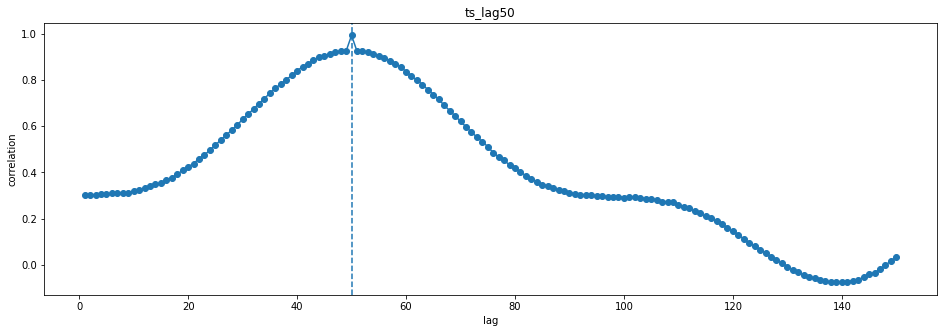

corr_maxlag = 100


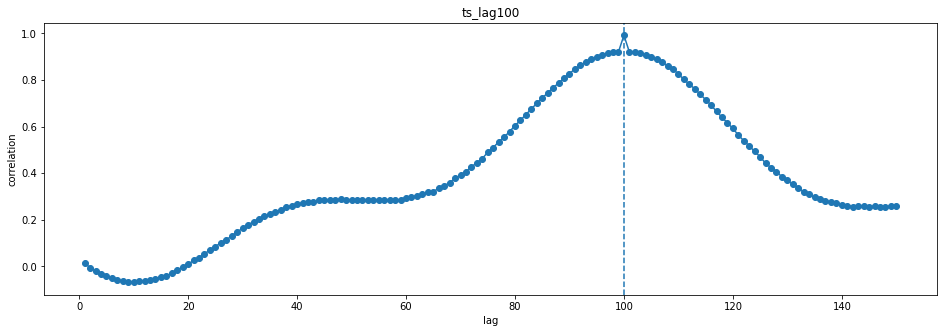

In [85]:

for lag in lags:
    plt.figure(figsize=(16, 5))
    plt.plot(1+np.arange(len(df_lag_corr)), df_lag_corr[f'ts_lag{lag}'], marker='o')
    plt.xlabel('lag')
    plt.ylabel('correlation')
    plt.title(f'ts_lag{lag}')
    maxlag = df_lag_corr[f'ts_lag{lag}'].argmax()+1
    plt.axvline(maxlag, linestyle='dashed')
    print(f'corr_maxlag = {maxlag}')
    plt.show()

In [ ]:
}